# Preprocessing<a id='Preprocessing'>

In this notebook, we will Preprocess our cleaned data to get it ready for modeling. We will also create and evaluate our models and choose the best one to predict movie ratings. 

## Table of Contents<a id='Table_of_Contents'>

* [Preprocessing](#Preprocessing)
  * [Table of Contents](#Table_of_Contents)
  * [Imports](#Imports)
  * [Constants & Functions](#Constants_Functions)
  * [Load The Data](#Load_the_Data)
  * [Merge DataFrames](#Merge_DataFrames)
  * [Create Dummy Columns](#Create_Dummy_Columns)
  * [Train Test Split](#Train_Test_Split)
  * [Scale the Data](#Scale_the_Data)
* [Modeling](#Modeling)
  * [Modeling - Random Forest](#Modeling_RF)
  * [Modeling - SVM](#Modeling-SVM)
  * [Modeling - Logistic Regression](#Modeling_LR)
  * [Modeling - Deep Learning](#Modeling_Deep_Learning)
* [Conclusion](#Conclusion)
* [Next Steps](#Next_Steps)

## Imports <a id='Imports'>

Let's import the necessary packages for this notebook. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Constants & Functions <a id='Constants_Functions'>

Here we will define our Constant variables and Functions that will be needed in this notebook. 

In [2]:
#Define the classnames our models will be using. 
class_names = ["G", "PG", "PG-13", "R", "TV-14", "TV-G", "TV-MA", "TV-PG", "TV-Y7"] 

In [3]:
#FUNCTIONS
def clean_confusion_matrix(columns, conf_matrix):
    '''Inputs the columns for the test variable as well as the confusion matrix and 
        creates a heatmap displaying the confusion matrix. Predicted values will be on the X axis
        and Actual values will be on the Y axis. '''
    
    plt.clf()
    class_labels_list = columns

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels_list, yticklabels=class_labels_list)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - Test Set')
    plt.show()

## Load the Data <a id='Load_the_Data'>

Let's load our data and view it to make sure it has imported in properly. . 

In [4]:
#Load
tags = pd.read_csv('data/clean_data/cleaned_tags.csv')
movies = pd.read_csv('data/clean_data/cleaned_movies.csv')
movie_tags = pd.read_csv('data/clean_data/cleaned_movie_tags.csv')

Here is the tags dataframe in case we need to refer back to what a particular tag means. 

In [5]:
tags

,category,tag_name,title,description
0,language,profanity,Profanity,NaN
1,language,blasphemy,Blasphemy,NaN
2,language,sexual_reference,Sexual References and Innuendos,"Any references or jokes about sex, flirting, i..."
3,language,childish_language,Childish Language,"Generally, things you would not want your 3-ye..."
4,language,racial_slurs,Racial Slurs and Bigoted Language,"Racist, sexist, and/or discriminatory language..."
5,violence,non_graphic,Non-Graphic,Violence without blood.
6,violence,graphic,Graphic,Violence with blood or breaking bones.
7,violence,disturbing_images,Disturbing Images,"Dead bodies, severed body parts, or object pro..."
8,violence,gore,Gore,"Gore, bloody guts, bloody severed body parts."
9,violence,violence_implied,Implied Violence,The violence is not seen on screen. Graphic de...


Here is our cleaned movies dataframe. 

In [6]:
movies

,imdb_id,name,year,mpaa_rating,duration_sec,studio,number_of_studios
0,tt11274492,The Out-Laws,2023,R,5700,Happy Madison Productions,1
1,tt12263384,Extraction 2,2023,R,7380,Other|AGBO,2
2,tt16419074,Air,2023,R,6720,Other|Skydance,2
3,tt14400246,Bird Box Barcelona,2023,TV-MA,7440,Nostromo Pictures|Other|Other|Other,4
4,tt1745960,Top Gun: Maverick,2022,PG-13,7860,Paramount|Jerry Bruckheimer Films|Other|Tencen...,5
...,...,...,...,...,...,...,...
1724,tt6902676,Guns Akimbo,2020,R,5700,Ingenious Media|Other|Other|Other|Other|Other|...,8
1725,tt3813310,Cop Car,2015,R,5280,Universal Pictures,1
1726,tt2091935,Mr. Right,2016,R,5700,Focus,1
1727,tt13372794,The Manor,2021,TV-MA,4860,Amazon Studios|Blumhouse Television,2


Here is our cleaned movie_tags dataframe. 

In [7]:
movie_tags

,imdb_id,category,tag_name,occurrence_cnt,duration_sec
0,tt0052357,language,blasphemy,1,0.1
1,tt0052357,violence,non_graphic,5,30.0
2,tt0052357,violence,disturbing_images,1,0.1
3,tt0052357,immodesty,immodesty,1,6.0
4,tt0052357,immodesty,nudity_implied,1,30.0
...,...,...,...,...,...
23975,tt9902160,violence,non_graphic,9,18.0
23976,tt9902160,violence,graphic,4,12.0
23977,tt9902160,immodesty,immodesty,3,30.0
23978,tt9902160,sexual,sexually_suggestive,1,6.0


Everything looks to be how we had saved it from the previous notebook, but one thing we want to do first is remove any Not Rated movies from our movies dataframe. This is because those are movies that have not been submitted for rating, so they won't help in predicting ratings. They may be good to run as further tests for our model later on. Let's first view our Not Rated movies. 

In [8]:
not_rated_movies = movies[movies['mpaa_rating']== 'NR'] 
not_rated_movies

,imdb_id,name,year,mpaa_rating,duration_sec,studio,number_of_studios
374,tt2938042,The Ride,2012,NR,1943,Angel Studios,1
532,tt8046730,Kevin Bozeman: Clean and Unfiltered,2017,NR,2760,Angel Studios,1
648,tt3986820,The Endless,2017,NR,6720,Other|Other|Other|Other,4
778,tt6259380,Code 8,2019,NR,5940,Téléfilm Canada|XYZ Films|The Fyzz|Other|Other...,6
841,tt14217100,Ferry,2021,NR,6360,Other,1
981,tt1680140,The Stolen,2017,NR,5880,Other,1
1013,tt9207700,Made in Italy,2020,NR,5640,Other|Other|Other,3
1032,tt5657712,I'm Not Here,2019,NR,4860,Other,1
1169,tt2736858,The Harrowing,2018,NR,6600,Other|Other|Other,3
1171,tt5073652,Married By Christmas,2016,NR,5160,Other,1


There are 24 Not Rated movies. We will now filter our movies dataframe to not include these 24. There were originally 1729 rows in the movies dataframe, so we would expect 1705 after we remove the Not Rated ones. 

In [9]:
movies = movies[movies['mpaa_rating']!= 'NR'] 
movies

,imdb_id,name,year,mpaa_rating,duration_sec,studio,number_of_studios
0,tt11274492,The Out-Laws,2023,R,5700,Happy Madison Productions,1
1,tt12263384,Extraction 2,2023,R,7380,Other|AGBO,2
2,tt16419074,Air,2023,R,6720,Other|Skydance,2
3,tt14400246,Bird Box Barcelona,2023,TV-MA,7440,Nostromo Pictures|Other|Other|Other,4
4,tt1745960,Top Gun: Maverick,2022,PG-13,7860,Paramount|Jerry Bruckheimer Films|Other|Tencen...,5
...,...,...,...,...,...,...,...
1724,tt6902676,Guns Akimbo,2020,R,5700,Ingenious Media|Other|Other|Other|Other|Other|...,8
1725,tt3813310,Cop Car,2015,R,5280,Universal Pictures,1
1726,tt2091935,Mr. Right,2016,R,5700,Focus,1
1727,tt13372794,The Manor,2021,TV-MA,4860,Amazon Studios|Blumhouse Television,2


In [10]:
movies[movies['mpaa_rating']== 'NR'] 

,imdb_id,name,year,mpaa_rating,duration_sec,studio,number_of_studios


We have successfully removed the Not Rated movies from our movies dataframe as there are onnly 1705 rows and nothing with an NR rating. Now we can merge our main two Dataframes (movies and movie_tags) into one to get it ready for Modeling. 

## Merge DataFrames <a id='Merge_DataFrames'>

In order to merge the DataFrames, we will need to perform a pivot to movie_tags to create dummy columns for each unique combination of category and tag_name using a multi-index of category and tag_name. Since we have only unique combinations, we use the aggregation 'first' option. Then we can flatten the multi-index into one column separated by an '_' and removing any leading and trailing white space. 

Once we have all of our tags together on the same row in the same column, we can then merge to the movies dataframe using the imdb_id to get everything in one big dataframe for our model. 

In [11]:
# Pivot the movie_tags dataframe to get dummy columns for each unique combination of category and tag_name
pivot_tags_df = movie_tags.pivot_table(index='imdb_id', columns=['category', 'tag_name'], values=['occurrence_cnt', 'duration_sec'], aggfunc='first')

# Flatten the MultiIndex columns
pivot_tags_df.columns = ['_'.join(col).strip() for col in pivot_tags_df.columns.values]

# Merge 'movies' with the pivoted tags DataFrame
merged_df = pd.merge(movies, pivot_tags_df, on='imdb_id', how='left')

# Fill NaN values with zeros
merged_df = merged_df.fillna(0)

merged_df

,imdb_id,name,year,mpaa_rating,duration_sec,studio,number_of_studios,duration_sec_drugs_drugs_illegal,duration_sec_drugs_drugs_implied,duration_sec_drugs_drugs_legal,...,occurrence_cnt_sexual_sex_implied,occurrence_cnt_sexual_sex_with_nudity,occurrence_cnt_sexual_sex_without_nudity,occurrence_cnt_sexual_sexual_assault,occurrence_cnt_sexual_sexually_suggestive,occurrence_cnt_violence_disturbing_images,occurrence_cnt_violence_gore,occurrence_cnt_violence_graphic,occurrence_cnt_violence_non_graphic,occurrence_cnt_violence_violence_implied
0,tt11274492,The Out-Laws,2023,R,5700,Happy Madison Productions,1,0.1,0.0,0.0,...,1.0,0.0,1.0,0.0,9.0,0.0,0.0,11.0,32.0,0.0
1,tt12263384,Extraction 2,2023,R,7380,Other|AGBO,2,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,65.0,75.0,0.0
2,tt16419074,Air,2023,R,6720,Other|Skydance,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
3,tt14400246,Bird Box Barcelona,2023,TV-MA,7440,Nostromo Pictures|Other|Other|Other,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,57.0,37.0,0.0
4,tt1745960,Top Gun: Maverick,2022,PG-13,7860,Paramount|Jerry Bruckheimer Films|Other|Tencen...,5,0.0,0.0,0.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,tt6902676,Guns Akimbo,2020,R,5700,Ingenious Media|Other|Other|Other|Other|Other|...,8,12.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3.0,31.0,6.0,102.0,57.0,0.0
1701,tt3813310,Cop Car,2015,R,5280,Universal Pictures,1,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,5.0,1.0
1702,tt2091935,Mr. Right,2016,R,5700,Focus,1,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,6.0,0.0,0.0,31.0,39.0,0.0
1703,tt13372794,The Manor,2021,TV-MA,4860,Amazon Studios|Blumhouse Television,2,0.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0,8.0,0.0


We can confirm it has pulled successfully looking at a movie that has multiple tags. We will use imdb_id tt0052357 as an example which has 8 total tags in the movie_tags dataframe. 

In [12]:
movie_tags[movie_tags['imdb_id']=='tt0052357']

,imdb_id,category,tag_name,occurrence_cnt,duration_sec
0,tt0052357,language,blasphemy,1,0.1
1,tt0052357,violence,non_graphic,5,30.0
2,tt0052357,violence,disturbing_images,1,0.1
3,tt0052357,immodesty,immodesty,1,6.0
4,tt0052357,immodesty,nudity_implied,1,30.0
5,tt0052357,sexual,kissing_normal,13,108.0
6,tt0052357,drugs,drugs_legal,14,36.0
7,tt0052357,drugs,drugs_implied,1,6.0


We will filter the merged dataframe for that specific movie id of tt0052357 and then only include all the new rows for duration and occurrence for each tag and category. Then we will return any rows that are not 0 to see what is populated. 

In [13]:
# Filter the DataFrame to include only rows with 'imdb_id' equal to 'tt0052357'
filtered_df = merged_df[merged_df['imdb_id'] == 'tt0052357']

# Select numeric columns
numeric_columns = filtered_df.iloc[:,7:]

# Select columns with values greater than 0
filtered_df = numeric_columns.loc[:, (numeric_columns > 0).any()]

filtered_df

,duration_sec_drugs_drugs_implied,duration_sec_drugs_drugs_legal,duration_sec_immodesty_immodesty,duration_sec_immodesty_nudity_implied,duration_sec_language_blasphemy,duration_sec_sexual_kissing_normal,duration_sec_violence_disturbing_images,duration_sec_violence_non_graphic,occurrence_cnt_drugs_drugs_implied,occurrence_cnt_drugs_drugs_legal,occurrence_cnt_immodesty_immodesty,occurrence_cnt_immodesty_nudity_implied,occurrence_cnt_language_blasphemy,occurrence_cnt_sexual_kissing_normal,occurrence_cnt_violence_disturbing_images,occurrence_cnt_violence_non_graphic
1442,6.0,36.0,6.0,30.0,0.1,108.0,0.1,30.0,1.0,14.0,1.0,1.0,1.0,13.0,1.0,5.0


In [14]:
filtered_df.shape

(1, 16)

16 columns are returned which is 8 for the occurrences, and 8 for the duration, so we have successfully merged our dataframes. Let's review the datatypes to make sure it all looks correct. 

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 0 to 1704
Data columns (total 67 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   imdb_id                                      1705 non-null   object 
 1   name                                         1705 non-null   object 
 2   year                                         1705 non-null   int64  
 3   mpaa_rating                                  1705 non-null   object 
 4   duration_sec                                 1705 non-null   int64  
 5   studio                                       1705 non-null   object 
 6   number_of_studios                            1705 non-null   int64  
 7   duration_sec_drugs_drugs_illegal             1705 non-null   float64
 8   duration_sec_drugs_drugs_implied             1705 non-null   float64
 9   duration_sec_drugs_drugs_legal               1705 non-null   float64
 10  

All the new datatypes are floats which is what we would expect. We have 30 active tags that we are using and see 60 columns (30 for duration and 30 for occurrence) so everything looks to be represented. We can move on to our remaining categorical columns to account for them with dummy encoding.  

## Create Dummy Columns <a id='Create_Dummy_Columns'>

The only remaining column that is not a numeric value that we will be using for our model is the studio column. In our Data Cleaning section, we had found that if there are multiple studios associated to a movie, they were separated by |'s. So to start, we will take our studio column and create a new dataframe where each row is a different studio, but a movie may have multiple rows. The columns will have a column for each studio (signified with a prefix of Studio) and each row will be a binary flag for whether a studio exists for that movie. Each row will only have 1 studio on it, which is why a movie would have multiple rows. 

In [16]:
# Splits the studio column by | and creates new rows for each studio
studios  = merged_df['studio'].str.split('|').explode()

# Creates dummy indicators to signify if a studio is present for that movie.
dummy_studios = pd.get_dummies(studios, prefix='Studio_', prefix_sep='')
dummy_studios

,Studio_21 Laps Entertainment,Studio_30WEST,Studio_87Eleven Productions,Studio_87North Productions,Studio_A24,Studio_AGBO,Studio_Addictive Pictures,Studio_Aloe Entertainment,Studio_Amazon Studios,Studio_Amblin Entertainment,...,Studio_Vertical Entertainment,Studio_Vinson Films,Studio_Voltage Pictures,Studio_Walden Media,Studio_Weinstein Company,Studio_Will Packer Productions,Studio_Wonderland Sound and Vision,Studio_Working Title Films,Studio_XYZ Films,Studio_Zero Gravity Management
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1703,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that we have all our dummy columns created, we can concat it to our main dataframe so that all the studio columns are added and each movie has a binary flag for whether that studio exists or not for that movie. 

In [17]:
movies_studio_combined = pd.concat([merged_df, dummy_studios.groupby(level=0).sum()], axis=1)
movies_studio_combined

,imdb_id,name,year,mpaa_rating,duration_sec,studio,number_of_studios,duration_sec_drugs_drugs_illegal,duration_sec_drugs_drugs_implied,duration_sec_drugs_drugs_legal,...,Studio_Vertical Entertainment,Studio_Vinson Films,Studio_Voltage Pictures,Studio_Walden Media,Studio_Weinstein Company,Studio_Will Packer Productions,Studio_Wonderland Sound and Vision,Studio_Working Title Films,Studio_XYZ Films,Studio_Zero Gravity Management
0,tt11274492,The Out-Laws,2023,R,5700,Happy Madison Productions,1,0.1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,tt12263384,Extraction 2,2023,R,7380,Other|AGBO,2,0.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,tt16419074,Air,2023,R,6720,Other|Skydance,2,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,tt14400246,Bird Box Barcelona,2023,TV-MA,7440,Nostromo Pictures|Other|Other|Other,4,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,tt1745960,Top Gun: Maverick,2022,PG-13,7860,Paramount|Jerry Bruckheimer Films|Other|Tencen...,5,0.0,0.0,0.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,tt6902676,Guns Akimbo,2020,R,5700,Ingenious Media|Other|Other|Other|Other|Other|...,8,12.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1701,tt3813310,Cop Car,2015,R,5280,Universal Pictures,1,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1702,tt2091935,Mr. Right,2016,R,5700,Focus,1,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1703,tt13372794,The Manor,2021,TV-MA,4860,Amazon Studios|Blumhouse Television,2,0.1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


We see the number of rows is correct. Let's confirm with imdb_id tt12263384 to make sure both studios are represented. 

In [18]:
# Filter the DataFrame to include only rows with 'imdb_id' equal to 'tt12263384'
filtered_df = movies_studio_combined[movies_studio_combined['imdb_id'] == 'tt12263384']

# Select numeric columns
numeric_columns = filtered_df.iloc[:,67:]

# Select columns with values greater than 0
filtered_df = numeric_columns.loc[:, (numeric_columns > 0).any()]

filtered_df

,Studio_AGBO,Studio_Other
1,1,1


We see both rows are returned so it looks like we have created our dummy columns successfully. Let's check the datatypes for these new columns.

In [19]:
movies_studio_combined.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 0 to 1704
Data columns (total 236 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    imdb_id                                       object 
 1    name                                          object 
 2    year                                          int64  
 3    mpaa_rating                                   object 
 4    duration_sec                                  int64  
 5    studio                                        object 
 6    number_of_studios                             int64  
 7    duration_sec_drugs_drugs_illegal              float64
 8    duration_sec_drugs_drugs_implied              float64
 9    duration_sec_drugs_drugs_legal                float64
 10   duration_sec_immodesty_immodesty              float64
 11   duration_sec_immodesty_nudity_art             float64
 12   duration_sec_immodesty_nudity_implied         

All the new columns have a numeric data type, and there doesn't look to be any duplicate or similar studio names so we have completed creating our combined dataframe. Let's now split the data into training and testing data. 

## Train Test Split<a id='Train_Test_Split'></a>

Now that we have converted all our categorical columns to be numerical and merged all our information between the movies and movie_tags dataframes, we can now create our X and y variables. Our X variable will be all information from movies and movie_tags except for the imdb_id, name, mpaa_rating, and studio columns. We don't need the identifiers which is why we are dropping the imdb_id's and names. Our target variable is the mpaa_rating, so we don't want that in our X, and then studios is dropped because we already split up the original studios column to account for multiple studios. Our y variable is our target variable so that will be based on our mpaa_rating column. Since we have not yet converted mpaa_rating to numerical values, we will also perform the operation to create dummy columns for y as well. 

In [20]:
#Create X and y

X = movies_studio_combined.drop(["imdb_id", 'name','mpaa_rating','studio'], axis=1)
y = pd.get_dummies(movies_studio_combined['mpaa_rating'], drop_first=False)

Let's review our X to see how it looks. 

In [21]:
X

,year,duration_sec,number_of_studios,duration_sec_drugs_drugs_illegal,duration_sec_drugs_drugs_implied,duration_sec_drugs_drugs_legal,duration_sec_immodesty_immodesty,duration_sec_immodesty_nudity_art,duration_sec_immodesty_nudity_implied,duration_sec_immodesty_nudity_without_sex,...,Studio_Vertical Entertainment,Studio_Vinson Films,Studio_Voltage Pictures,Studio_Walden Media,Studio_Weinstein Company,Studio_Will Packer Productions,Studio_Wonderland Sound and Vision,Studio_Working Title Films,Studio_XYZ Films,Studio_Zero Gravity Management
0,2023,5700,1,0.1,0.0,0.0,240.0,0.1,0.0,0.1,...,0,0,0,0,0,0,0,0,0,0
1,2023,7380,2,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2023,6720,2,0.0,0.0,0.0,42.0,24.0,0.0,6.0,...,0,0,0,0,0,0,0,0,0,0
3,2023,7440,4,0.0,0.0,0.0,0.0,6.0,0.0,12.0,...,0,0,0,0,0,0,0,0,0,0
4,2022,7860,5,0.0,0.0,0.1,12.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2020,5700,8,12.0,0.0,0.0,6.0,24.0,0.0,12.0,...,0,0,0,0,0,0,0,0,0,0
1701,2015,5280,1,6.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1702,2016,5700,1,0.0,0.0,0.0,102.0,12.0,54.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1703,2021,4860,2,0.1,0.0,0.0,6.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Our X looks how we would expect it to. Let's verify our columns and datatypes. 

In [22]:
X.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 0 to 1704
Data columns (total 232 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    year                                          int64  
 1    duration_sec                                  int64  
 2    number_of_studios                             int64  
 3    duration_sec_drugs_drugs_illegal              float64
 4    duration_sec_drugs_drugs_implied              float64
 5    duration_sec_drugs_drugs_legal                float64
 6    duration_sec_immodesty_immodesty              float64
 7    duration_sec_immodesty_nudity_art             float64
 8    duration_sec_immodesty_nudity_implied         float64
 9    duration_sec_immodesty_nudity_without_sex     float64
 10   duration_sec_language_blasphemy               float64
 11   duration_sec_language_childish_language       float64
 12   duration_sec_language_profanity               

We have all the columns we are expecting with all numeric datatypes. Let's now review y. 

In [23]:
y

,G,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y7
0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1700,0,0,0,1,0,0,0,0,0
1701,0,0,0,1,0,0,0,0,0
1702,0,0,0,1,0,0,0,0,0
1703,0,0,0,0,0,0,1,0,0


Our y has all the ratings as we didn't drop a column when we created the dummy columns. To start, we aren't too worried about any colinearity issues, so we will keep all the columns as it provides more information and is easier to understand. Depending on our model performance, that could be an option to help improve performance. 

Now that we have our X and y created, let's split them into training and testing sets for our model to use. 

In [24]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

We used a test size of 20% due to the size of our data. We are also stratifying our y so we can have a relatively even mix of all our classes so we can thoroughly test how it does for each classification. Let's review our X_train data. 

In [25]:
X_train

,year,duration_sec,number_of_studios,duration_sec_drugs_drugs_illegal,duration_sec_drugs_drugs_implied,duration_sec_drugs_drugs_legal,duration_sec_immodesty_immodesty,duration_sec_immodesty_nudity_art,duration_sec_immodesty_nudity_implied,duration_sec_immodesty_nudity_without_sex,...,Studio_Vertical Entertainment,Studio_Vinson Films,Studio_Voltage Pictures,Studio_Walden Media,Studio_Weinstein Company,Studio_Will Packer Productions,Studio_Wonderland Sound and Vision,Studio_Working Title Films,Studio_XYZ Films,Studio_Zero Gravity Management
986,2004,7800,1,0.0,0.0,12.0,180.0,0.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1242,1996,6540,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
615,1999,6480,1,0.0,54.0,6.0,6.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1416,2017,6480,1,0.0,0.0,0.0,288.0,0.0,0.0,48.0,...,0,0,0,0,0,0,0,0,0,0
1467,2020,5940,1,0.0,0.0,0.0,48.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,2011,6720,1,0.0,0.0,30.0,840.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1223,2017,5820,1,0.1,150.0,6.0,0.0,0.0,24.0,60.0,...,0,0,0,0,0,0,0,0,0,0
77,2002,7440,1,0.0,12.0,36.0,6.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1341,2018,7020,1,12.0,6.0,0.0,54.0,6.0,6.0,6.0,...,0,0,0,0,0,0,0,0,0,0


We see the X_train data has around 80% of the original data. Let's make sure we see the remaining 20% in X_test. 

In [26]:
X_test

,year,duration_sec,number_of_studios,duration_sec_drugs_drugs_illegal,duration_sec_drugs_drugs_implied,duration_sec_drugs_drugs_legal,duration_sec_immodesty_immodesty,duration_sec_immodesty_nudity_art,duration_sec_immodesty_nudity_implied,duration_sec_immodesty_nudity_without_sex,...,Studio_Vertical Entertainment,Studio_Vinson Films,Studio_Voltage Pictures,Studio_Walden Media,Studio_Weinstein Company,Studio_Will Packer Productions,Studio_Wonderland Sound and Vision,Studio_Working Title Films,Studio_XYZ Films,Studio_Zero Gravity Management
631,2011,5520,1,66.0,0.0,0.0,168.0,0.0,0.0,72.0,...,0,0,0,0,0,0,0,0,0,0
22,1985,6960,1,48.0,48.0,24.0,120.0,18.0,0.0,0.1,...,0,0,0,0,0,0,0,0,0,0
273,2021,9480,1,0.0,0.0,0.0,438.0,192.0,90.0,96.0,...,0,0,0,0,0,0,0,0,0,0
1701,2015,5280,1,6.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
92,2023,5460,4,18.0,6.0,48.0,174.0,6.0,0.0,0.1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2011,6660,1,24.0,36.0,0.0,258.0,0.0,12.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1233,1964,5700,1,0.0,6.0,984.0,198.0,0.0,0.0,6.0,...,0,0,0,0,0,0,0,0,0,0
81,2022,7800,3,0.0,0.0,0.0,60.0,18.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1486,2009,5400,1,0.0,0.0,0.0,84.0,6.0,0.1,0.0,...,0,0,0,0,0,0,0,0,0,0


It appears that everything looks how we would expect it to. Let's verify y_train and y_test now. 

In [27]:
y_train

,G,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y7
986,0,0,1,0,0,0,0,0,0
1242,0,0,0,1,0,0,0,0,0
615,0,1,0,0,0,0,0,0,0
1416,0,0,0,1,0,0,0,0,0
1467,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1507,0,0,1,0,0,0,0,0,0
1223,0,0,1,0,0,0,0,0,0
77,0,0,1,0,0,0,0,0,0
1341,0,0,0,1,0,0,0,0,0


In [28]:
y_test

,G,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y7
631,0,0,0,1,0,0,0,0,0
22,0,1,0,0,0,0,0,0,0
273,0,0,0,1,0,0,0,0,0
1701,0,0,0,1,0,0,0,0,0
92,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1571,0,0,0,1,0,0,0,0,0
1233,0,1,0,0,0,0,0,0,0
81,0,0,0,1,0,0,0,0,0
1486,0,1,0,0,0,0,0,0,0


The rows match X_train and X_test respectively, so we should be good to scale our X data now. 

## Scale the Data<a id='Scale_the_Data'></a>

Let's first confirm that there are no remaining non numeric datatypes in X_train.

In [29]:
# Get the column names and data types
column_info = X_train.dtypes

# Create a DataFrame to store the column names and data types
column_info_df = pd.DataFrame({'Column Name': column_info.index, 'Data Type': column_info.values})

# Filter the DataFrame to select columns that are not numeric (excluding boolean uint8 columns)
non_numeric_columns = column_info_df[column_info_df['Data Type'].apply(lambda x: not pd.api.types.is_numeric_dtype(x))]

non_numeric_columns

,Column Name,Data Type


Since we don't have any non numeric datatypes, we can proceed in scaling our data. We will scale all of our X values (X_train and X_test) using the training data. 

In [30]:
#Standardize
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns,index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns, index=X_test.index )


The data should be scaled now. Let's review and make sure it looks okay. 

In [31]:
X_train_scaled

,year,duration_sec,number_of_studios,duration_sec_drugs_drugs_illegal,duration_sec_drugs_drugs_implied,duration_sec_drugs_drugs_legal,duration_sec_immodesty_immodesty,duration_sec_immodesty_nudity_art,duration_sec_immodesty_nudity_implied,duration_sec_immodesty_nudity_without_sex,...,Studio_Vertical Entertainment,Studio_Vinson Films,Studio_Voltage Pictures,Studio_Walden Media,Studio_Weinstein Company,Studio_Will Packer Productions,Studio_Wonderland Sound and Vision,Studio_Working Title Films,Studio_XYZ Films,Studio_Zero Gravity Management
986,-0.956081,1.242184,-0.491462,-0.308978,-0.315367,-0.092523,0.475124,-0.295062,-0.159574,-0.402280,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
1242,-1.781130,0.037575,-0.491462,-0.308978,-0.315367,-0.385055,-0.620515,-0.295062,-0.373259,-0.402280,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
615,-1.471737,-0.019787,-0.491462,-0.308978,0.844618,-0.238789,-0.583994,-0.295062,-0.373259,-0.402280,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
1416,0.384625,-0.019787,-0.491462,-0.308978,-0.315367,-0.385055,1.132507,-0.295062,-0.373259,0.374199,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
1467,0.694019,-0.536048,-0.491462,-0.308978,-0.315367,-0.385055,-0.328345,-0.295062,-0.373259,-0.402280,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,-0.234162,0.209662,-0.491462,-0.308978,-0.315367,0.346275,4.492466,-0.295062,-0.373259,-0.402280,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
1223,0.384625,-0.650773,-0.491462,-0.305720,2.906814,-0.238789,-0.620515,-0.295062,0.481480,0.568318,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
77,-1.162343,0.898010,-0.491462,-0.308978,-0.057593,0.492541,-0.583994,-0.295062,-0.373259,-0.402280,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
1341,0.487756,0.496474,-0.491462,0.081962,-0.186480,-0.385055,-0.291824,-0.131782,-0.159574,-0.305220,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695


In [32]:
X_test_scaled

,year,duration_sec,number_of_studios,duration_sec_drugs_drugs_illegal,duration_sec_drugs_drugs_implied,duration_sec_drugs_drugs_legal,duration_sec_immodesty_immodesty,duration_sec_immodesty_nudity_art,duration_sec_immodesty_nudity_implied,duration_sec_immodesty_nudity_without_sex,...,Studio_Vertical Entertainment,Studio_Vinson Films,Studio_Voltage Pictures,Studio_Walden Media,Studio_Weinstein Company,Studio_Will Packer Productions,Studio_Wonderland Sound and Vision,Studio_Working Title Films,Studio_XYZ Films,Studio_Zero Gravity Management
631,-0.234162,-0.937585,-0.491462,1.841189,-0.315367,-0.385055,0.402081,-0.295062,-0.373259,0.762438,...,-0.04695,-0.038320,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
22,-2.915573,0.439111,-0.491462,1.254780,0.715731,0.200009,0.109911,0.194779,-0.373259,-0.400662,...,-0.04695,-0.038320,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
273,0.797150,2.848330,-0.491462,-0.308978,-0.315367,-0.385055,2.045539,4.929914,2.832015,1.150677,...,-0.04695,-0.038320,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
1701,0.178363,-1.167034,-0.491462,-0.113508,-0.315367,-0.385055,-0.583994,-0.295062,-0.373259,-0.402280,...,-0.04695,-0.038320,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
92,1.003412,-0.994947,1.643424,0.277431,-0.186480,0.785073,0.438602,-0.131782,-0.373259,-0.400662,...,-0.04695,26.095977,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,-0.234162,0.152300,-0.491462,0.472901,0.457956,-0.385055,0.949900,-0.295062,0.054111,-0.402280,...,-0.04695,-0.038320,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
1233,-5.081328,-0.765498,-0.491462,-0.308978,-0.186480,23.602569,0.584687,-0.295062,-0.373259,-0.305220,...,-0.04695,-0.038320,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
81,0.900281,1.242184,0.931796,-0.308978,-0.315367,-0.385055,-0.255302,0.194779,-0.373259,-0.402280,...,-0.04695,-0.038320,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
1486,-0.440425,-1.052309,-0.491462,-0.308978,-0.315367,-0.385055,-0.109217,-0.131782,-0.369698,-0.402280,...,-0.04695,-0.038320,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695


All the scaled data looks to be in order, so we should be ready to create our models now.

# Modeling<a id='Modeling'>

In this notebook, we will be looking at four different models. 

    - Random Forest
    - Support Vector Machine
    - Logistic Regression
    - Deep Learning (keras)
    
Let's start with the Random Forest model. 

## Modeling - Random Forest<a id='Modeling_RF'></a>

For our random forest model, we need to find the best value for the hyperparameter n_estimators and max_depth. To do that, we will try some different values and see which ones have the best accuracy. 

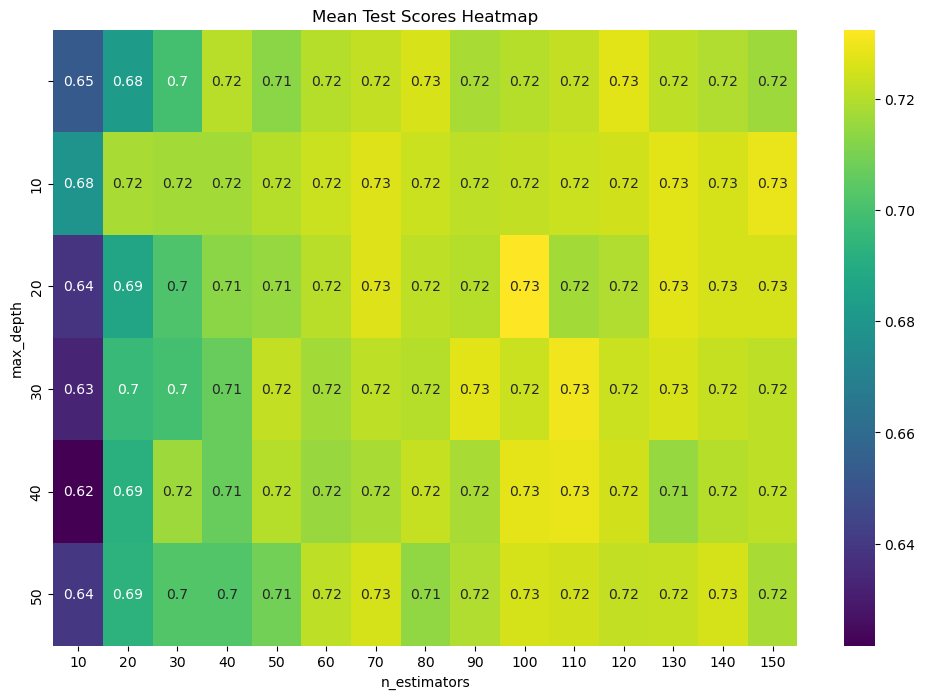

Top 1: n_estimators=100, max_depth=40, Mean Test Score=0.7324148890325362
Top 2: n_estimators=110, max_depth=40, Mean Test Score=0.730209006679595
Top 3: n_estimators=150, max_depth=10, Mean Test Score=0.7287438052143935
Top 4: n_estimators=110, max_depth=30, Mean Test Score=0.7287411118293472
Top 5: n_estimators=100, max_depth=20, Mean Test Score=0.7280165912518854


In [33]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': np.arange(10, 151, 10), 
    'max_depth': [None, 10, 20, 30, 40, 50]
}

# Create a KFold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Perform grid search with cross-validation
rf_cv = GridSearchCV(rf_classifier, param_grid, cv=kf)
rf_cv.fit(X_train_scaled, y_train)

# Extract the results from the grid search
results = rf_cv.cv_results_

# Get the mean test scores for all parameter combinations
mean_test_scores = results['mean_test_score']

# Reshape the mean_test_scores to match the grid shape
n_estimators_range = len(param_grid['n_estimators'])
max_depth_range = len(param_grid['max_depth'])

mean_test_scores_matrix = mean_test_scores.reshape(max_depth_range, n_estimators_range)

# Find the top 5 parameter combinations
top_5_indices = np.argpartition(mean_test_scores, -5)[-5:]
top_5_scores = mean_test_scores[top_5_indices]
top_5_params = [(param_grid['n_estimators'][i], param_grid['max_depth'][j]) for i, j in zip(top_5_indices % n_estimators_range, top_5_indices // n_estimators_range)]

# Create a heatmap of the mean test scores
plt.figure(figsize=(12, 8))
sns.heatmap(mean_test_scores_matrix, cmap='viridis', annot=True, xticklabels=param_grid['n_estimators'], yticklabels=param_grid['max_depth'])
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('Mean Test Scores Heatmap')
plt.show()

# Sort the top parameter combinations and their scores by mean test score in ascending order
sorted_top_params = [param for _, param in sorted(zip(top_5_scores, top_5_params))]
sorted_top_scores = sorted(top_5_scores)
sorted_top_scores.reverse()

# Print the top 5 parameter combinations and their scores in ascending order
for i, (n_estimators, max_depth) in enumerate(sorted_top_params):
    print(f"Top {i+1}: n_estimators={n_estimators}, max_depth={max_depth}, Mean Test Score={sorted_top_scores[i]}")

We see our best estimator for the random forest model is with an n_estimator of 100 and a max_depth of 40. Let's train our model using 100 for n_estimators and a max_depth of 40, and then we can predict with that model using the test data. 

In [34]:
rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=40,random_state=42)

rf_classifier.fit(X_train_scaled, y_train)

y_pred_test = rf_classifier.predict(X_test_scaled)

Now that we have trained our random forest model and predicted using the test data, let's see what our prediction variable looks like.

In [35]:
y_pred_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

We see it is in a matrix due to our categories for our y variable. Let's gather our labels so we can make better sense of the data.

In [36]:
y_test_labels = np.argmax(y_test.values, axis=1)
y_pred_labels = np.argmax(y_pred_test, axis=1)

In [37]:
y_test_labels

array([3, 1, 3, 3, 2, 3, 3, 2, 1, 3, 2, 2, 6, 4, 1, 3, 1, 2, 2, 3, 2, 3,
       1, 3, 3, 3, 6, 3, 3, 2, 2, 3, 4, 2, 3, 3, 3, 3, 3, 1, 7, 1, 6, 3,
       3, 2, 6, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 4, 3, 3, 2, 2, 1, 7,
       3, 2, 2, 2, 6, 2, 3, 2, 1, 2, 2, 3, 1, 1, 7, 6, 2, 3, 3, 1, 3, 2,
       3, 1, 3, 3, 2, 2, 3, 2, 1, 3, 6, 3, 3, 2, 2, 6, 2, 2, 3, 3, 3, 2,
       7, 2, 1, 3, 6, 3, 6, 6, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 6, 3,
       1, 6, 2, 3, 3, 3, 2, 2, 3, 2, 6, 3, 2, 2, 3, 2, 3, 1, 2, 3, 3, 4,
       3, 3, 3, 2, 2, 3, 3, 3, 7, 2, 2, 3, 3, 1, 0, 6, 3, 2, 3, 6, 1, 2,
       2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 1, 3, 3, 3, 1, 2, 3, 1, 2,
       2, 3, 2, 1, 3, 3, 2, 2, 1, 2, 6, 1, 2, 2, 2, 2, 6, 3, 3, 8, 4, 4,
       1, 3, 3, 2, 6, 2, 2, 2, 1, 0, 3, 3, 3, 2, 2, 6, 1, 2, 4, 3, 6, 2,
       3, 3, 3, 3, 1, 3, 2, 2, 3, 4, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 3, 2,
       1, 2, 3, 2, 3, 2, 2, 1, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 6,
       3, 3, 3, 1, 4, 6, 2, 3, 6, 3, 6, 3, 3, 3, 2,

The above marks our actual categories that our test data is in (example, 3 = R). Let's see how it compared to our prediction labels. 

In [38]:
y_pred_labels

array([3, 0, 3, 3, 2, 3, 3, 2, 1, 3, 2, 3, 3, 0, 2, 3, 0, 2, 0, 3, 2, 3,
       1, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 2, 3, 3,
       3, 0, 3, 3, 2, 3, 2, 3, 3, 2, 3, 0, 3, 3, 2, 2, 3, 3, 2, 2, 0, 1,
       0, 0, 2, 3, 0, 2, 3, 2, 1, 2, 2, 3, 1, 1, 0, 3, 2, 3, 0, 1, 3, 3,
       3, 1, 3, 3, 2, 2, 3, 2, 1, 3, 3, 3, 3, 2, 2, 3, 2, 0, 3, 3, 3, 2,
       0, 2, 1, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 3, 2, 3, 0, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2,
       0, 3, 3, 2, 2, 3, 3, 3, 1, 2, 2, 3, 3, 1, 0, 3, 3, 2, 3, 3, 1, 2,
       2, 3, 3, 0, 3, 3, 0, 3, 2, 2, 3, 2, 2, 0, 3, 3, 3, 0, 0, 3, 1, 2,
       2, 3, 2, 1, 3, 3, 2, 2, 1, 2, 3, 1, 2, 2, 2, 0, 3, 3, 3, 1, 2, 3,
       0, 0, 2, 0, 3, 2, 2, 2, 0, 2, 3, 3, 3, 0, 0, 3, 2, 0, 2, 2, 3, 3,
       3, 3, 3, 3, 1, 3, 2, 0, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 0, 2,
       2, 2, 3, 0, 3, 0, 2, 1, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 3, 1, 2, 3, 2, 3, 3, 3, 0, 3, 3, 3, 2,

We see a lot of similarities, but there are a lot of 0's in our predictions that weren't in the test data. Let's gather some scores and create a confusion matrix so we can make better sense of our results. 

In [39]:
# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.71


In [40]:
# Generate classification report
class_report = classification_report(y_test_labels, y_pred_labels,zero_division=1, target_names=class_names,output_dict=True) 
report_df = pd.DataFrame(class_report).transpose()

report_df

,precision,recall,f1-score,support
G,0.021277,0.500000,0.040816,2.00000
PG,0.793103,0.605263,0.686567,38.00000
PG-13,0.828283,0.796117,0.811881,103.00000
R,0.825301,0.901316,0.861635,152.00000
TV-14,1.000000,0.000000,0.000000,11.00000
TV-G,1.000000,0.000000,0.000000,1.00000
TV-MA,1.000000,0.000000,0.000000,26.00000
TV-PG,1.000000,0.000000,0.000000,6.00000
TV-Y7,1.000000,0.000000,0.000000,2.00000
accuracy,0.712610,0.712610,0.712610,0.71261


We see that the accuracy for our model is 71% in total, but we see we perform way better in some categories over the others, which is why our total is lower for all categories. Let's generate a confusion matrix to better understand our results. 

In [41]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[  1   0   1   0   0   0   0   0   0]
 [ 10  23   5   0   0   0   0   0   0]
 [ 15   1  82   5   0   0   0   0   0]
 [ 11   0   4 137   0   0   0   0   0]
 [  3   0   6   2   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0]
 [  3   0   1  22   0   0   0   0   0]
 [  4   2   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0]]


We see that we do really well for predicting the third category. We do a decent job at predicting the second category as well, but do very poorly with category 0 which is what we noticed earlier. Let's add our original labels to a confusion matrix so we can interpret the results a bit better. 

<Figure size 640x480 with 0 Axes>

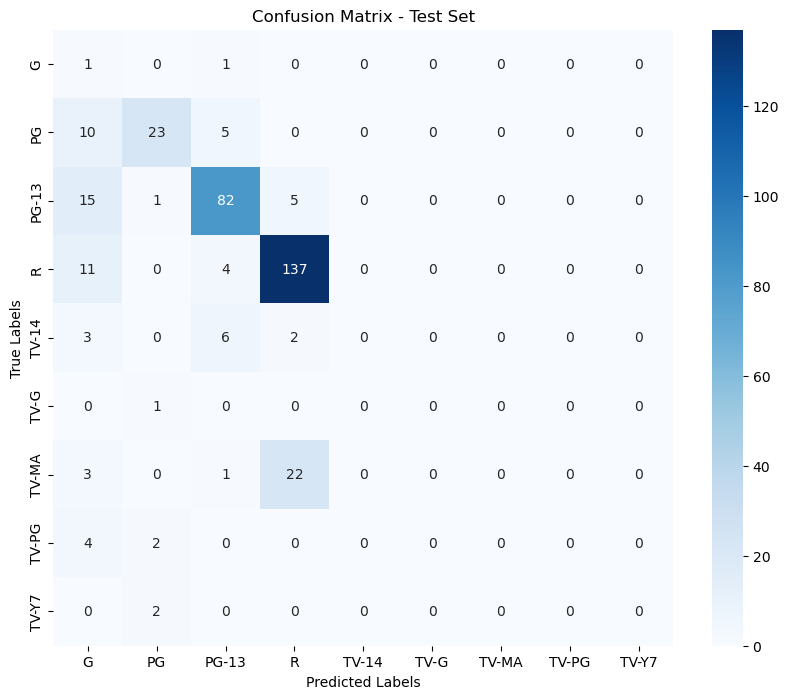

In [42]:
clean_confusion_matrix(columns=y_test.columns, conf_matrix=conf_matrix)

With the results of this confusion matrix, we see that the third category that we predicted very well is the rated R category. The majority of the ones we missed for that were predicted TV-MA which is essentially the TV version of R, so that prediction is really good. The second best was the PG-13 prediction where we got a majority of them correct. The ones we missed were relatively close or were the TV equivalent so overall we are pleased with the results for that prediction. However, the one we did really bad at with this model is predicting G ratings as we had predicted a lot of them for all different types of ratings. There may be some underlying issue with why it's predicting that incorrectly, which would involve digging into the algorithm further to see why it is predicting G for all these movies. 

Let's view the top 10 features the model is considering. 

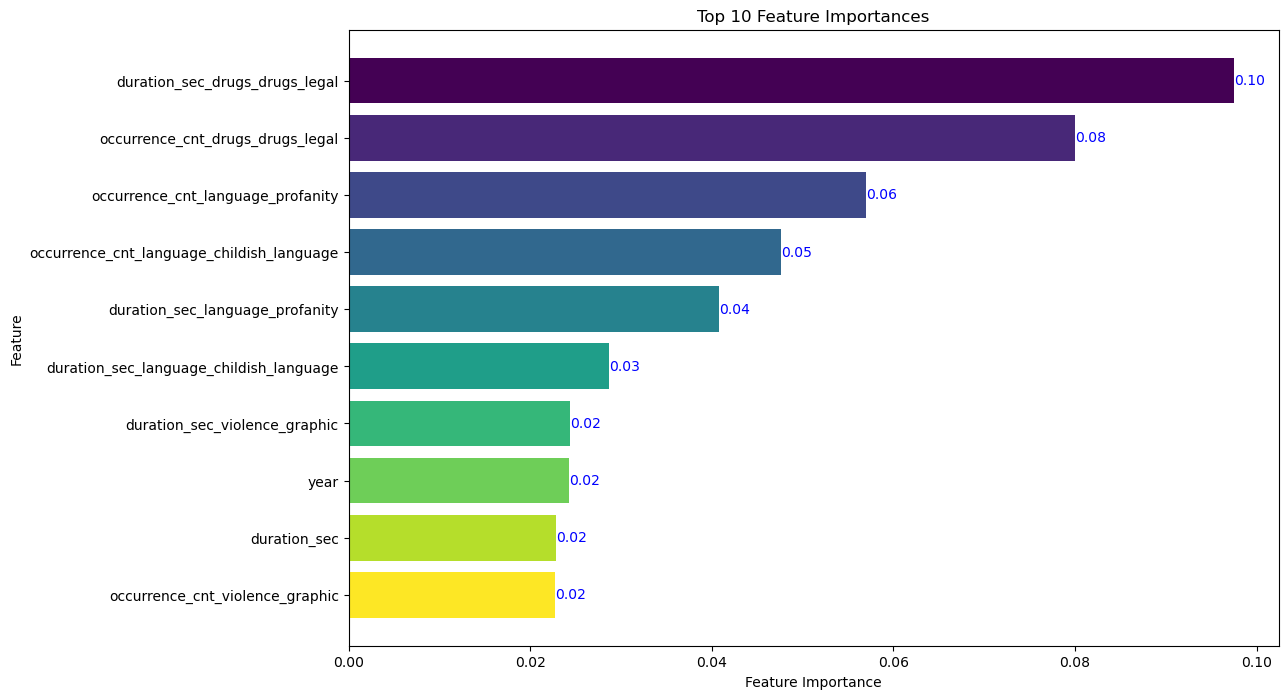

In [43]:
feature_importance = rf_classifier.feature_importances_

feature_names= X_train_scaled.columns

importance_dict = dict(zip(feature_names, feature_importance))

# Sort the feature importances in descending order
sorted_importance = sorted(importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Extract the top 10 feature importances and their corresponding feature names and values
top_10_importance = sorted_importance[:10]
top_10_features, top_10_values = zip(*top_10_importance)

# Create a color map for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_features)))

# Create a bar graph for feature importances
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_features, top_10_values, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest importance at the top

# Add feature importance values to the bars with negative values to the left
for feature, importance, bar in zip(top_10_features, top_10_values, bars):
    if importance < 0:
        plt.text(importance, bar.get_y() + bar.get_height() / 2, f'{importance:.2f}', ha='right', va='center', color='red')
    else:
        plt.text(importance, bar.get_y() + bar.get_height() / 2, f'{importance:.2f}', ha='left', va='center', color='blue')

plt.show()

The two most important features our model was using was the duration sec and occurrence cnt for the drugs_legal category. So it was seeing a pattern with movies with that tag for the ratings it would be. We found from our Exploratory Data Analysis that Drugs was our least populated category of all the movie tags, so it's interesting those are the ones the model considered the most important. Now let's look at the least important features.

In [44]:
#Zip the features
feature_names, feature_importance = zip(*sorted_importance)

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df.tail(10)

,Feature,Importance
222,Studio_Apatow Productions,0.0
223,Studio_Dentsu,0.0
224,Studio_G-BASE,0.0
225,Studio_Gary Sanchez Productions,0.0
226,Studio_Imagine Entertainment,0.0
227,Studio_Marc Platt Productions,0.0
228,Studio_Material Pictures,0.0
229,Studio_Monkeypaw Productions,0.0
230,Studio_Rough House Pictures,0.0
231,Studio_The Hideaway Entertainment,0.0


All the least important features are studios so there doesn't appear to be anything that helps with the rating when looking at studios. Let's perform some cross validation to see how accurate our model can be. 

In [45]:
#CROSS VALIDATION

# Create your Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=40)

# Perform 5-fold cross-validation
scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores (Random Forest):", scores)

# Calculate and print the mean accuracy
mean_accuracy = scores.mean()
print("Mean Accuracy (Random Forest):", mean_accuracy)

Cross-Validation Scores (Random Forest): [0.74452555 0.71532847 0.7080292  0.67883212 0.77941176 0.75
 0.82352941 0.72794118 0.71323529 0.72794118]
Mean Accuracy (Random Forest): 0.7368774151996564


We see overall, our model has an accuracy of around 73.7%. That's not terrible considering it didn't guess any of the TV show ratings, and performed very poorly for predicting G ratings. Let's now look at another model to see how it performs. 

## Modeling - SVM<a id='Modeling-SVM'>

For our next model, we will try a Support Vector Machine (SVM). First we will start with finding our hyperparameters which will include the C value as well as the kernel. 

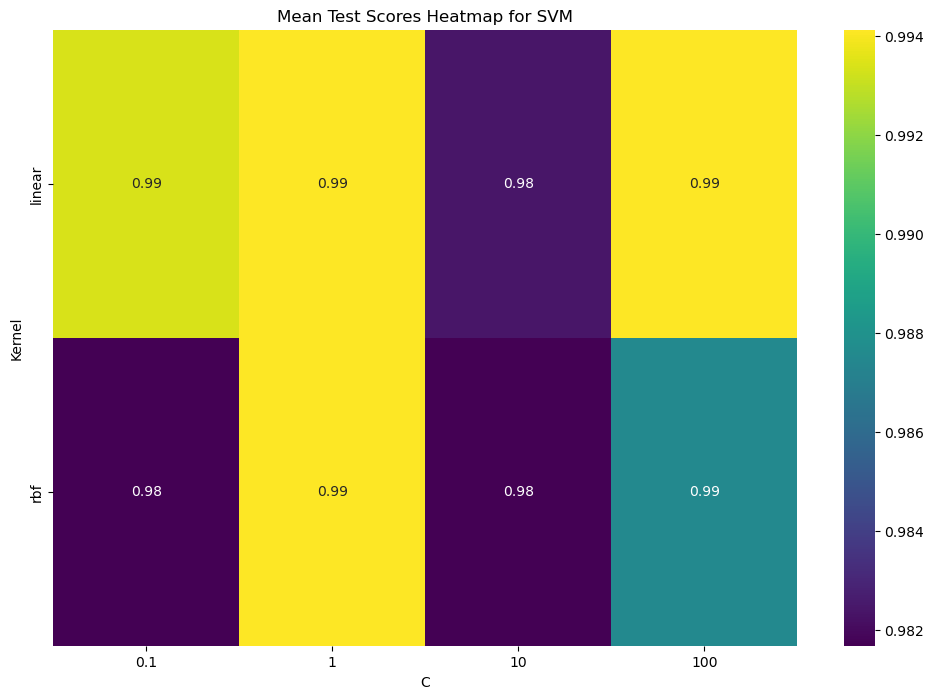

Top 1: C=100, Kernel=rbf, Mean Test Score=0.9941338073691014
Top 2: C=0.1, Kernel=linear, Mean Test Score=0.9941338073691014
Top 3: C=1, Kernel=linear, Mean Test Score=0.9941338073691014
Top 4: C=1, Kernel=rbf, Mean Test Score=0.9934012066365007
Top 5: C=100, Kernel=linear, Mean Test Score=0.9875296272355095


In [46]:
#Define the hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'rbf'],  
}

# Create a KFold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create an SVM classifier
svm_classifier = SVC()

# Perform grid search with cross-validation for SVM
svm_cv = GridSearchCV(svm_classifier, param_grid_svm, cv=kf)
multi_output_classifier = MultiOutputClassifier(svm_cv)
multi_output_classifier.fit(X_train_scaled, y_train)

# Access the results and scores for SVM
results_svm = multi_output_classifier.estimators_[0].cv_results_

# Get the mean test scores for all parameter combinations
mean_test_scores_svm = results_svm['mean_test_score']

# Reshape the mean_test_scores to match the grid shape
C_range = len(param_grid_svm['C'])
kernel_range = len(param_grid_svm['kernel'])

mean_test_scores_matrix_svm = mean_test_scores_svm.reshape(kernel_range, C_range)

# Find the top 5 parameter combinations for SVM
top_5_indices_svm = np.argpartition(mean_test_scores_svm, -5)[-5:]
top_5_scores_svm = mean_test_scores_svm[top_5_indices_svm]
top_5_params_svm = [(param_grid_svm['C'][i], param_grid_svm['kernel'][j]) for i, j in zip(top_5_indices_svm % C_range, top_5_indices_svm // C_range)]

# Sort the top parameter combinations and their scores by mean test score in ascending order for SVM
sorted_top_params_svm = [param for _, param in sorted(zip(top_5_scores_svm, top_5_params_svm))]
sorted_top_scores_svm = sorted(top_5_scores_svm)
sorted_top_scores_svm.reverse()

# Create a heatmap of the mean test scores for SVM
plt.figure(figsize=(12, 8))
sns.heatmap(mean_test_scores_matrix_svm, cmap='viridis', annot=True, xticklabels=param_grid_svm['C'], yticklabels=param_grid_svm['kernel'])
plt.xlabel('C')
plt.ylabel('Kernel')
plt.title('Mean Test Scores Heatmap for SVM')
plt.show()

# Print the top 5 parameter combinations and their scores in ascending order for SVM
for i, (C, kernel) in enumerate(sorted_top_params_svm):
    print(f"Top {i+1}: C={C}, Kernel={kernel}, Mean Test Score={sorted_top_scores_svm[i]}")

We see a lot of really high scores when using GridSearch, which suggest overfitting potentially. We also see the top 3 all have the exact same Mean Test Score of 99.41%. Since all the scores are the same that means they all performed equally well during GridSearch. In order to prevent overfitting, we will choose the value with the lowest C which is a C of 0.1 and a kernel of Linear. Let's train our model using those parameters. 

In [47]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=0.1)

# Create a MultiOutputClassifier
multi_output_classifier = MultiOutputClassifier(svm_classifier)

# Train the multi-label classifier on the training data
multi_output_classifier.fit(X_train_scaled, y_train)

# Predict the multi-label classes for X_test_scaled
y_pred = multi_output_classifier.predict(X_test_scaled)

Now that we have trained our model, let's create our test and prediction labes based on our results and then look at the accuracy and classification reports. 

In [48]:
y_test_labels = np.argmax(y_test.values, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

In [49]:
# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.63


In [50]:
# Evaluate the model 
class_report = classification_report(y_test, y_pred,target_names=class_names,zero_division=1,output_dict=True)
report_df = pd.DataFrame(class_report).transpose()
report_df

,precision,recall,f1-score,support
G,1.000000,0.000000,0.000000,2.0
PG,0.764706,0.684211,0.722222,38.0
PG-13,0.712871,0.699029,0.705882,103.0
R,0.818792,0.802632,0.810631,152.0
TV-14,0.500000,0.181818,0.266667,11.0
TV-G,0.000000,0.000000,0.000000,1.0
TV-MA,0.363636,0.153846,0.216216,26.0
TV-PG,1.000000,0.166667,0.285714,6.0
TV-Y7,0.000000,0.000000,0.000000,2.0
micro avg,0.746711,0.665689,0.703876,341.0


We see a lower accuracy with this model when compared to the Random Forest model, so overall, this model performs much worse. We see even the best category it predicted, which is R, did not have nearly as high of a score as the Random Forest model. Let's look at the confusion matrix to see the results of the predictions. 

<Figure size 640x480 with 0 Axes>

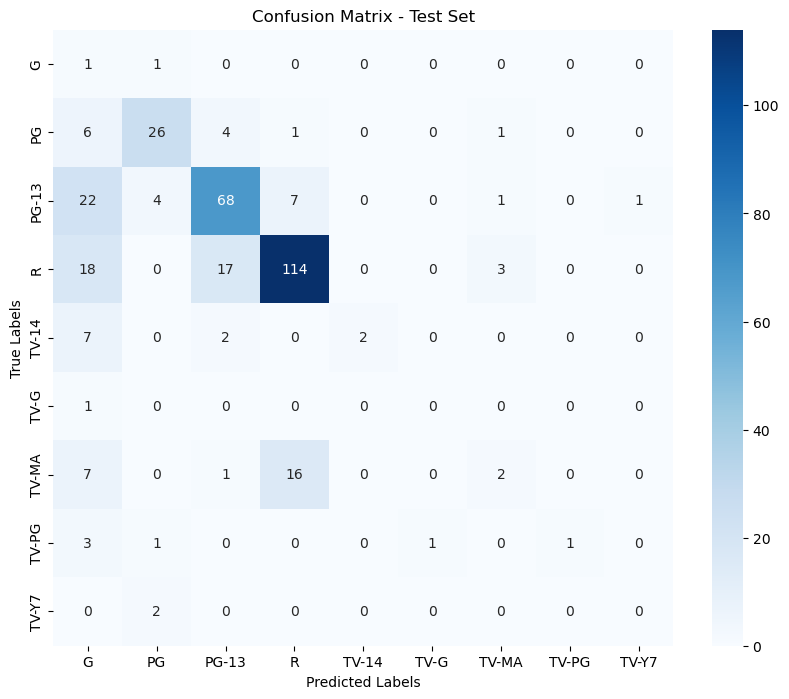

In [51]:
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
clean_confusion_matrix(columns=y_test.columns, conf_matrix=conf_matrix)

We see a similar pattern with predicting G values that our Random Forest model had where it was overpredicting the G values. However, this SVM model only out-performs the predictions of the Random Forest model in the PG, TV-MA, and TV-PG ratings. But the out-performance in those ratings is small, in comparison to how the Random Forest model out-performed in predicting the R rating. Let's perform cross validation to see what the range of outcomes could be for the accuracy for this model. 

In [52]:
# Create your SVM classifier
svm_classifier = SVC(kernel='linear', C=0.1)

# Create a MultiOutputClassifier
multi_output_classifier = MultiOutputClassifier(svm_classifier)

# Perform 5-fold cross-validation
scores = cross_val_score(multi_output_classifier, X_train_scaled, y_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores (SVM):", scores)

# Calculate and print the mean accuracy
mean_accuracy = scores.mean()
print("Mean Accuracy (SVM):", mean_accuracy)

Cross-Validation Scores (SVM): [0.60583942 0.55474453 0.60583942 0.59124088 0.59558824 0.67647059
 0.68382353 0.59558824 0.63235294 0.60294118]
Mean Accuracy (SVM): 0.6144428939458995


With an average accuracy of around 61.4%, this appears to be a worse model when compared to our Random Forest model, so we will not consider using SVM for our final model. Let's move on to our next model. 

## Modeling - Logistic Regression <a id='Modeling_LR'>

Our next model will be Logistic Regression. As with the other two models, we will perform some hyperparmeter tuning to start to find our values of C and max_iter. 

In [53]:
# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=UserWarning)

# Define the logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Create a MultiOutputClassifier
multi_output_classifier = MultiOutputClassifier(logistic_regression)

# Define the parameter grid for grid search
param_grid = {
    'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(multi_output_classifier, param_grid, cv=5, scoring='accuracy')

# Train the grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator and its hyperparameters
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Stop suppressing warnings
with warnings.catch_warnings():
    warnings.filterwarnings("default")

Best Hyperparameters: {'estimator__C': 0.1}


We see our best parameter is a C of 0.1. Let's create our model with that parameter and see how it performs. 

In [54]:
# Create the Logistic Regression model
logistic_regression = LogisticRegression(C=0.1, max_iter=1000, random_state=42)

# Create a MultiOutputClassifier
multi_output_classifier = MultiOutputClassifier(logistic_regression)

# Train the model on the training data
multi_output_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = multi_output_classifier.predict(X_test_scaled)

In [55]:
#Create our labels for accuracy and confusion matrix
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test.values, axis=1)

In [56]:
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.63


In [57]:
# Evaluate the model
class_report = classification_report(y_test, y_pred, target_names=class_names, zero_division=1, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()
report_df

,precision,recall,f1-score,support
G,0.000000,0.000000,0.000000,2.0
PG,0.787879,0.684211,0.732394,38.0
PG-13,0.729167,0.679612,0.703518,103.0
R,0.813333,0.802632,0.807947,152.0
TV-14,0.500000,0.363636,0.421053,11.0
TV-G,0.000000,0.000000,0.000000,1.0
TV-MA,0.222222,0.076923,0.114286,26.0
TV-PG,0.500000,0.166667,0.250000,6.0
TV-Y7,0.000000,0.000000,0.000000,2.0
micro avg,0.745033,0.659824,0.699844,341.0


This is another case of the accuracy being vastly lower than Random Forest. We see the statistics for our R category are lower as well for Logistic Regression. Let's review our predictions in a confusion matrix to see how they performed. 

<Figure size 640x480 with 0 Axes>

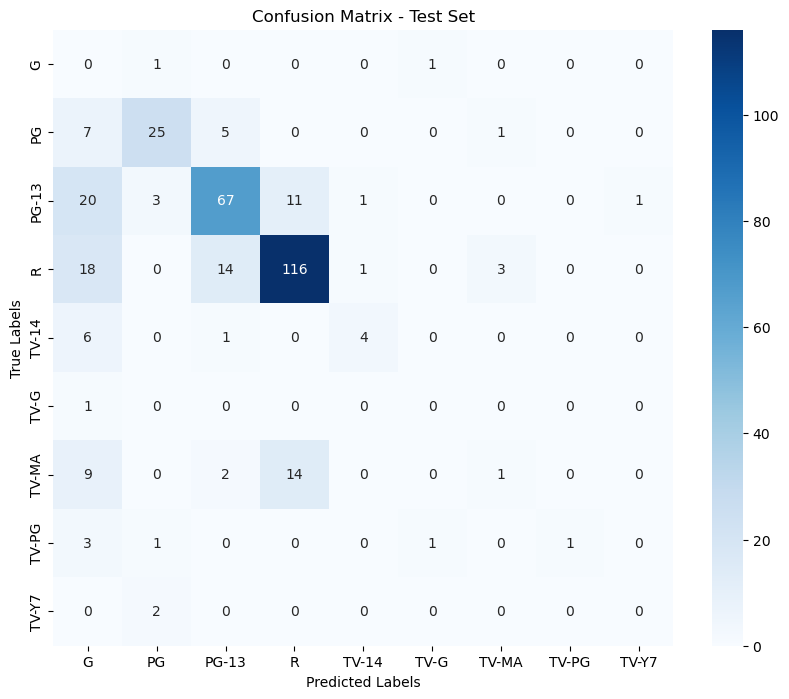

In [58]:
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
clean_confusion_matrix(columns=y_test.columns, conf_matrix=conf_matrix)

We see in our confusion matrix that the logistic regression model has similar patterns of prediction as the other two models, with overpredicting the G rating, predicting the R rating for most TV-MA movies, and higher predictions in the R and PG-13 categories. However, it didn't get nearly as many right as our Random Forest model, so this looks to be an inferior model as well. Let's see what features this model was viewing as important.

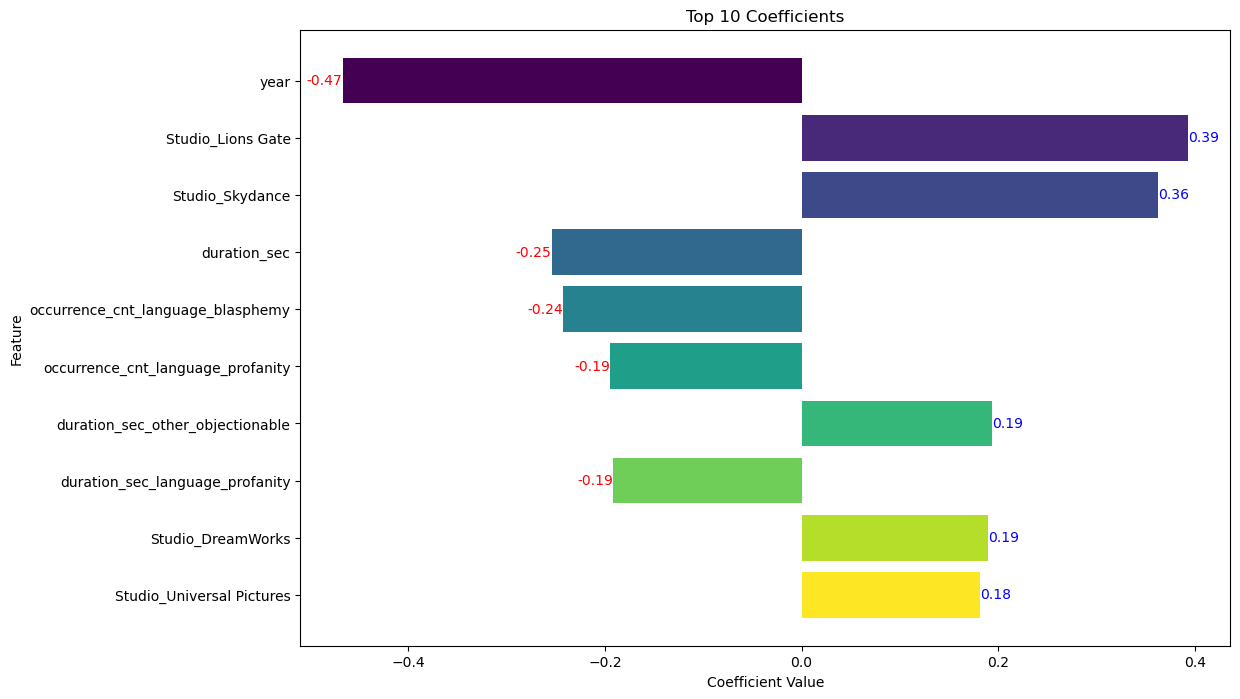

In [59]:
# Access coefficients for the first estimator in the MultiOutputClassifier
feature_cos = multi_output_classifier.estimators_[0].coef_[0]

feature_names = X_train_scaled.columns

# Create a dictionary of feature names and their corresponding coefficients
coef_dict = dict(zip(feature_names, feature_cos))

# Sort the coefficients by absolute value in descending order
sorted_coef = sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Extract the top 10 coefficients and their corresponding feature names
top_10_coef = sorted_coef[:10]
top_10_features, top_10_values = zip(*top_10_coef)

# Create a color map for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_features)))

# Create a bar graph
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_features, top_10_values, color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Coefficients')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest coefficient at the top

# Add coefficient values to the bars with negative values to the left
for feature, value, bar in zip(top_10_features, top_10_values, bars):
    if value < 0:
        plt.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', ha='right', va='center', color='red')
    else:
        plt.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', ha='left', va='center', color='blue')

plt.show()

Compared to the Random Forest model, we see our logistic regression model was heavily factoring in the year the movie was made, as well as some of the top studios. Only 4 movie tags were in the top 10 for the logistic regression model which is very interesting when comparing to the Random Forest model. Now let's look at the smallest coefficients. 

In [60]:
# Create a DataFrame from all sorted coefficients
all_coef_df = pd.DataFrame(sorted_coef, columns=['Feature', 'Coefficient'])
all_coef_df.tail(10)

,Feature,Coefficient
222,duration_sec_sexual_kissing_passion,-0.001232
223,Studio_Likely Story,-0.001008
224,Studio_87Eleven Productions,-0.000903
225,Studio_Gary Sanchez Productions,-0.000851
226,Studio_Movistar+,-0.000833
227,Studio_Nu Boyana Film Studios,-0.000633
228,Studio_Bay Films,-0.000458
229,Studio_Chernin Entertainment,-0.000366
230,Studio_Point Grey Pictures,-0.000197
231,Studio_Addictive Pictures,0.000000


We see a majority of the small coefficients are for smaller studios. It seems like a consistent theme across the models is that the studios tend to not be important to our models. 

Overall, our Random Forest model is still the best performing model we have so we will continue to stick with that one. However, we have one last model to try. 

## Modeling - Deep Learning <a id='Modeling_Deep_Learning'>

Our last model we will be reveiwing in regards to this dataset will be a deep learning model using keras. Let's create our layers for our model and then see how it performs. 

In [61]:
input_shape = (232,)
num_classes = 9

model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

We have created a model where the original input is our original number of features in our X_train_scaled which is 232. We also have a hidden layer with 128 values as the input, and then we have a dropout of 0.5 to reduce overfitting before we get to our final layer which is our number of categories, 9. Now that we have our model created, let's compile our model. 

In [62]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
epochs = 50
batch_size = 32

history = model.fit(X_train_scaled, y_train,
                    epochs=epochs,
                    batch_size=batch_size
                    ,validation_split=0.2
                   )

Epoch 1/50
35/35 [==============================] - 1s 8ms/step - loss: 2.4087 - accuracy: 0.2979 - val_loss: 1.4465 - val_accuracy: 0.5934
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 1.4559 - accuracy: 0.5802 - val_loss: 1.1425 - val_accuracy: 0.6557
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 1.1801 - accuracy: 0.6508 - val_loss: 1.0511 - val_accuracy: 0.7033
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 0.9819 - accuracy: 0.6865 - val_loss: 0.9752 - val_accuracy: 0.7070
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 0.8744 - accuracy: 0.7149 - val_loss: 0.9377 - val_accuracy: 0.7070
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 0.8087 - accuracy: 0.7369 - val_loss: 0.9080 - val_accuracy: 0.7106
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 0.7091 - accuracy: 0.7617 - val_loss: 0.8838 - val_accuracy: 0.7070
Epoch 8/50
35/35 [==

After compiling our model using the adam optimizer, a loss function for categorical_crossentropy, and defining accuracy as our metric of choice, we can fit our model with 50 epochs and a batch size of 32. Let's do some cross validation with our training data to see how it performs. 

In [64]:
# Convert the y_train DataFrame to a numpy array
y_train_array = y_train.values

# Reset the index of X_train_scaled
X_train_scaled.reset_index(drop=True, inplace=True)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store accuracy scores for each fold
accuracy_scores = []

for train_index, test_index in skf.split(X_train_scaled, y_train_array.argmax(axis=1)):
    X_train, X_test = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
    y_train_fold, y_test_fold = y_train_array[train_index], y_train_array[test_index]


    # Fit the model on the training data
    model.fit(X_train, y_train_fold, epochs=50, batch_size=32) 

    # Evaluate the model on the test data
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_test_labels = np.argmax(y_test_fold, axis=1)  # Use y_test_fold here

    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    accuracy_scores.append(accuracy)

# Calculate the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

Epoch 1/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.8808
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.8873
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8790
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8955
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.9065
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2599 - accuracy: 0.9102
Epoch 7/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.9010
Epoch 8/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2465 - accuracy: 0.9065
Epoch 9/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2835 - accuracy: 0.9047
Epoch 10/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.9175
Epoch 11/50
35/35 [

35/35 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9817
Epoch 16/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9863
Epoch 17/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0658 - accuracy: 0.9789
Epoch 18/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9835
Epoch 19/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9798
Epoch 20/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.9881
Epoch 21/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.9844
Epoch 22/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9798
Epoch 23/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9817
Epoch 24/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9835
Epoch 25/50
35/35 [===

In [65]:
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation of Accuracy: {std_accuracy:.2f}')

Mean Accuracy: 0.91
Standard Deviation of Accuracy: 0.05


We see an accuracy of 91% on our training data so it's very consistent no matter which data it's training on based on the other training data. Let's now predict on our test data and see how it performs.

In [66]:
y_pred = model.predict(X_test_scaled)

11/11 [==============================] - 0s 2ms/step


In [67]:
#Create our labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test.values, axis=1)

In [68]:
# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.74


We see an accuracy of 74% using the unseen data. This is an improvement over our Random Forest model overall, but let's look at the specifics to see how it performed. 

In [69]:
# Generate classification report
class_report = classification_report(y_test_labels, y_pred_labels,zero_division=1, target_names=class_names,output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

report_df

,precision,recall,f1-score,support
G,1.000000,0.000000,0.000000,2.00000
PG,0.800000,0.736842,0.767123,38.00000
PG-13,0.747573,0.747573,0.747573,103.00000
R,0.755814,0.855263,0.802469,152.00000
TV-14,0.600000,0.545455,0.571429,11.00000
TV-G,0.000000,0.000000,0.000000,1.00000
TV-MA,0.470588,0.307692,0.372093,26.00000
TV-PG,0.666667,0.333333,0.444444,6.00000
TV-Y7,1.000000,0.000000,0.000000,2.00000
accuracy,0.736070,0.736070,0.736070,0.73607


With the remaining statistics, we see overall improved scores across a majority the ratings. However, there is some differences for the R predictions still, so let's view our confusion matrix to see how it compares. 

<Figure size 640x480 with 0 Axes>

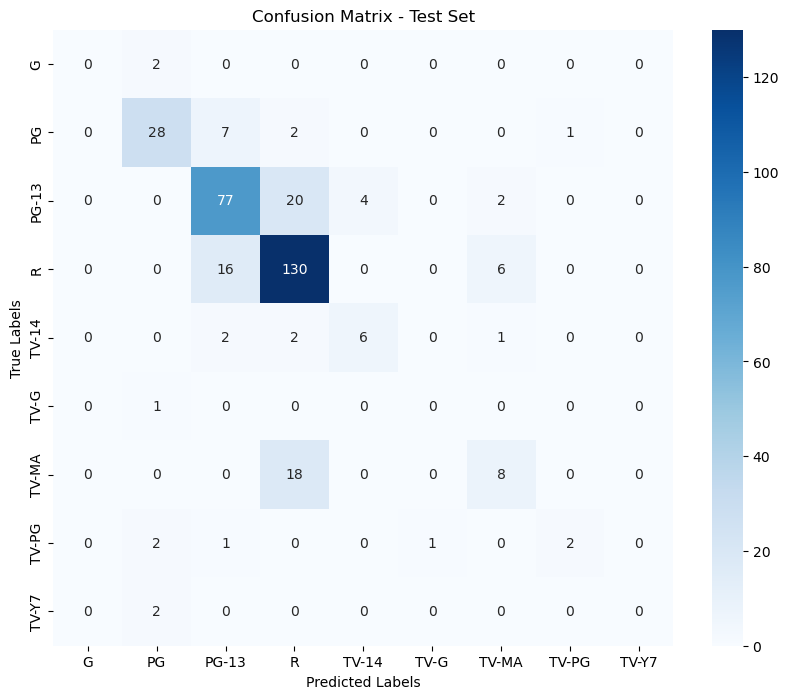

In [70]:
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
clean_confusion_matrix(columns=y_test.columns, conf_matrix=conf_matrix)

The first thing that jumps out is that no G ratings were predicted at all. This model must have found a better pattern to go off of for the ratings as it's not overguessing the G rating like all our other models. We do see similar performances in the main ratings of PG-13 and R, but where this model really shines is being way more accurate around the other ratings, including the TV ratings. The ratings it did get wrong could be considered extremely close to the actual rating in scale, so overall, this is by far the best performing model we created. 

# Conclusion <a id ='Conclusion'>

After going through four different model types, Random Forest, SVM, Logistic Regression, and Deep Learning, we found that the Deep Learning approach gave us the best results. It had the highest accuracy of all the models and all the predictions for the rating were similarly grouped with no predictions that were completely inaccurate. As a result, this is the model we would recommend for this issue. 

# Next Steps <a id='Next_Steps'>

Some things to consider would be to continue tuning the Deep Learning model to see if more layers or different types of layers improves performance. We could also take the Unrated movies and run them through the model to see what it would rate those movies. Then we could look up what the content of the movie actually is and see if the rating would make sense for that type of movie. Lastly, we could explore in some of our other models (namely Random Forest) why it is over guessing the G rating. The Random Forest model performed decently well, and if we were able to figure out a way for it to no longer over guess the G category, it might be able to matchup with the Deep Learning model in regards to performance, and the metrics would be more easily accessible to be able to find out why it was making certian predictions with Random Forest. 